## Muhammad Fikri
## 2109106010
## Informatika A1-21
### Posttest 6 unsupervised learning

In [1]:
import pandas as pd
import seaborn as sns
import warnings #untuk menghilangkan merah eror

In [2]:
warnings.filterwarnings('ignore')

# unsupervised learning

In [9]:
df = pd.read_csv('telecom_churn.csv')
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
784,0,107,1,1,3.02,1,281.1,83,90.2,7.19,11.2
785,0,69,1,0,0.00,3,228.2,70,62.0,13.19,10.7
786,0,85,1,0,0.00,0,209.8,82,53.0,9.73,11.3
787,1,24,1,0,0.00,2,265.6,86,63.0,10.44,11.1


# subset & data scaling

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
df_subset = df[['AccountWeeks', 'DataUsage']]

In [12]:
ss = StandardScaler()

In [13]:
x_scaled = ss.fit_transform(df_subset)

# K-MEANS CLUSTERING

In [14]:
from sklearn.cluster import KMeans

In [15]:
model_kmeans = KMeans(n_clusters = 3)

In [16]:
model_kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [17]:
labels = model_kmeans.labels_

In [18]:
print(labels) # untuk memunculkan label cluster #karena versi pandas berbeda hasilnya juga beda

[2 2 0 1 1 0 2 0 0 2 1 1 0 1 1 0 2 1 2 1 0 1 0 0 0 0 2 1 1 1 0 1 0 1 2 2 2
 1 2 0 1 2 1 0 1 2 1 0 0 2 1 1 1 1 1 1 0 0 1 0 0 2 2 2 1 1 1 0 0 0 0 2 0 1
 1 1 1 0 1 1 0 0 2 2 0 2 1 0 2 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 2 2 2 0 0
 1 1 0 1 2 1 1 2 1 1 1 0 0 0 1 0 1 1 2 1 1 1 1 0 1 1 1 2 2 0 2 0 1 0 0 0 1
 0 2 0 0 1 1 1 0 1 2 1 2 1 0 2 1 0 2 0 0 2 1 1 2 1 1 0 1 1 0 0 1 2 0 2 1 0
 1 0 1 0 1 0 0 1 1 2 2 1 0 2 1 2 1 1 0 0 2 0 1 0 1 1 0 2 2 1 1 1 0 0 0 1 2
 1 1 1 1 0 2 2 2 1 2 1 1 1 0 2 0 0 1 0 0 1 1 0 1 2 1 1 2 2 0 1 2 1 2 0 0 1
 1 1 0 0 1 0 2 2 0 1 0 1 0 2 0 2 1 0 0 2 0 0 1 2 2 1 2 0 0 0 1 0 0 1 2 2 0
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 2 1 1 0 1 2 2 0 2 1 2 0 0 0 2 2 2 1 0 0 1 1
 0 1 2 1 1 1 1 1 1 2 1 2 0 2 0 2 1 1 2 1 0 1 1 0 2 2 2 0 0 2 1 0 0 0 1 0 0
 0 1 0 1 1 2 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 2 1 1 1 1 2 1 2 0 1 1 1
 0 0 0 1 1 1 0 1 0 0 0 2 0 2 1 1 2 2 0 0 2 0 1 1 0 0 1 2 2 0 1 0 1 2 1 2 0
 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 0 1 0 2 1 2 1 2 0 2 2 1 1 0 1 2 1 1 2 0 1 0
 0 1 0 1 1 1 1 0 0 1 1 1 

### setelah melakukan clustering di dalam penelitian biasanya melakukan tabel atau crosstab

## buat cross_tab untuk membandingkan antar cluster

In [20]:
#buat dataframe dengan label dan churn dari iris sebagai kolom
df_kmeans = pd.DataFrame({'labels': labels, 'Churn': df.Churn})

In [21]:
#buat cross_TAB
ct1 = pd.crosstab(df_kmeans['labels'], df_kmeans['Churn'])

In [22]:
print(ct1)

Churn     0   1
labels         
0       221  37
1       283  51
2       182  15


# melihat centroid

In [23]:
import matplotlib.pyplot as plt

In [24]:
plt.style.use('ggplot')

In [25]:
# untuk mengambil semua baris pada kolom tertentu (berbentuk array)
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [26]:
# menampung koordinat dari semua centoroid\
centroids = model_kmeans.cluster_centers_

In [27]:
# pisahkan centroid koordinat x dan koordinat y
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

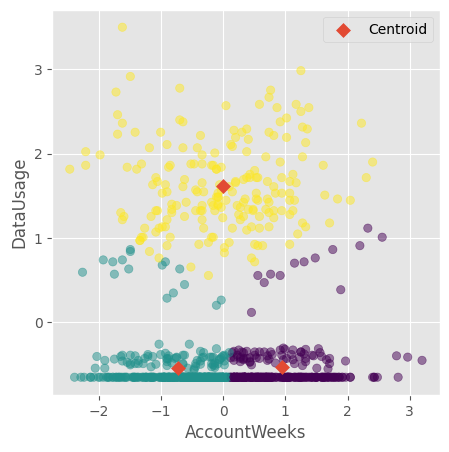

In [28]:
# visualisasi cluster
plt.figure(figsize=(5,5))

plt.scatter(xs, ys, alpha=0.5, c = labels) # untuk titik data x dan y tiap cluster

plt.scatter(centroids_x, centroids_y, label = "Centroid", marker="D", s=50) #titik titik centroid marker untuk bentuk yang berbeda
 
plt.xlabel("AccountWeeks") #beri label 
plt.ylabel("DataUsage")

plt.legend()
plt.show()

## perbandingan untuk lebel aktual

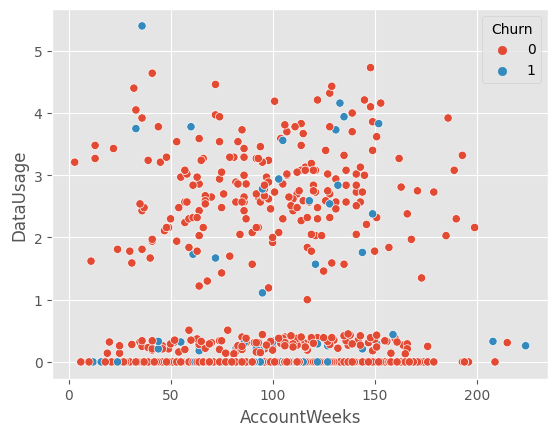

In [30]:
df_aktual = df[["AccountWeeks", "DataUsage", "Churn"]]
sns.scatterplot(x = "AccountWeeks", y = "DataUsage", data = df_aktual, hue = "Churn")
plt.show()

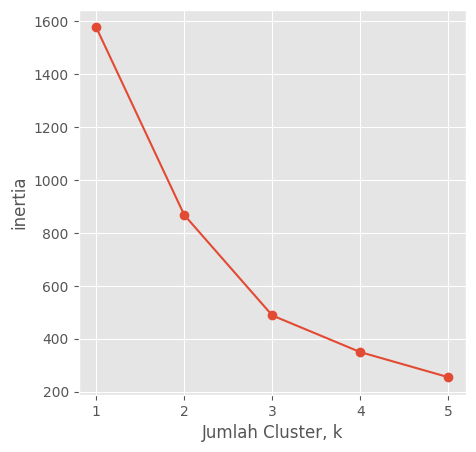

In [32]:
#jumlah cluster

ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(5,5))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

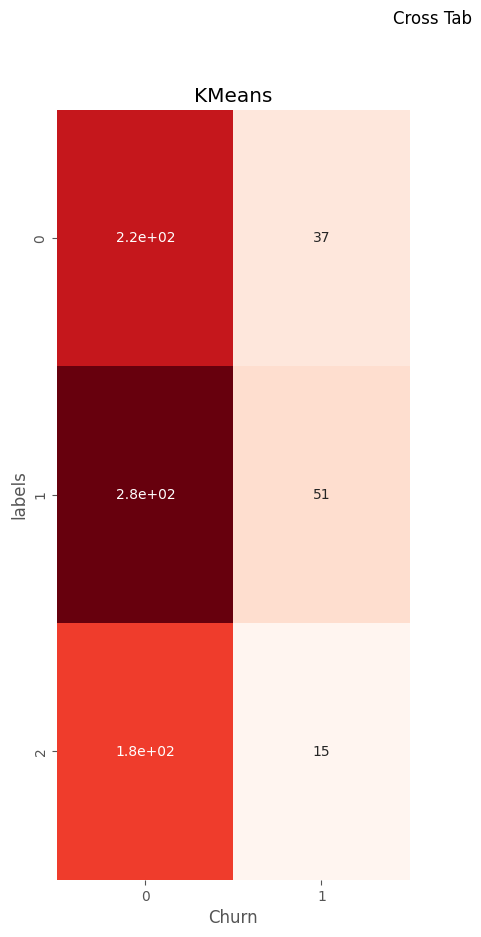

In [42]:
plt.figure(figsize=(10,10))
plt.suptitle("Cross Tab")

plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1, annot=True, cbar=False, cmap="Reds")

plt.show()